In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Orange3_colab/Orange3/Logistic_Regression_Stroke/healthcare-dataset-3.csv')
df.shape

(3915, 11)

In [5]:
#더미변수를 만들어야 함
#범주형 변수 중에서 0과 1값만 가지는 4개의 변수명을 제외하고 cols2에 저장
cols2 = ['gender_encoded', 'work_type_encoded', 'smoking_status_encoded']

#cols2에 담긴 변수들의 더미 변수를 생성(더미 변수를 생성한 원본 변수는 제거함)
df1 = pd.get_dummies(df, columns = cols2)
df1.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_encoded,residence_type_encoded,gender_encoded_0.0,gender_encoded_1.0,gender_encoded_2.0,work_type_encoded_0.0,work_type_encoded_1.0,work_type_encoded_2.0,work_type_encoded_3.0,smoking_status_encoded_0.0,smoking_status_encoded_1.0,smoking_status_encoded_2.0,smoking_status_encoded_3.0
0,67.0,0,1,228.69,36.6,1,1.0,1.0,0,1,0,0,0,1,0,0,1,0,0
1,80.0,0,1,105.92,32.5,1,1.0,0.0,0,1,0,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1.0,1.0,1,0,0,0,0,1,0,0,0,0,1


In [6]:
df1.shape

(3915, 19)

In [7]:
list(df1.columns)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'ever_married_encoded',
 'residence_type_encoded',
 'gender_encoded_0.0',
 'gender_encoded_1.0',
 'gender_encoded_2.0',
 'work_type_encoded_0.0',
 'work_type_encoded_1.0',
 'work_type_encoded_2.0',
 'work_type_encoded_3.0',
 'smoking_status_encoded_0.0',
 'smoking_status_encoded_1.0',
 'smoking_status_encoded_2.0',
 'smoking_status_encoded_3.0']

In [8]:
#기준 더미 변수로 정한 3개의 더미 변수명을 cols3에 저장
cols3= ['gender_encoded_0.0', 'work_type_encoded_1.0', 'smoking_status_encoded_2.0']

#cols3에 저장된 3개 더미 변수명을 데이터프레임에서 제거
df1.drop(cols3, axis = 1, inplace = True)
df1.shape


(3915, 16)

In [9]:
df1.to_csv(
    '/content/drive/MyDrive/Orange3_colab/Orange3/Logistic_Regression_Stroke/healthcare-dataset-3-dummy.csv', index=False
)

In [11]:
df = df1
df.shape

(3915, 16)

In [12]:
#언더샘플링
data = df.drop(['stroke'], axis = 1) #타깃 변수를 제외한 변수를 datadp wjwkd
target = df['stroke'] # 타깃 변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler

#타깃 변수의 소수 클래스 및 다수 클래스를 1:3의 비율로 언더샘플링
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state = 2)

#data와 target에 언더샘플링 적용
data_under, target_under = undersample.fit_resample(data, target)

In [13]:
#데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size = 0.5, random_state = 42, stratify = target_under
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (386, 15)
X_test shape: (386, 15)


In [14]:
#로지스틱 회귀 기본 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', random_state = 0, n_jobs = -1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print("Training set score:{:.5f}".format(model.score(X_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_train, pred)))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training set score:0.79275
Test set score:0.65026


In [15]:
#그리드 서치

lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', random_state = 0, n_jobs = -1)

from sklearn.model_selection import GridSearchCV
params = {'solver' :['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'accuracy', cv=5, n_jobs = -1)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy: {:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy: 0.76697
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [16]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set: {:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set: 0.75648


In [17]:
#변수명을 index로 만들고 coefficient값을 매칭한 데이터프레임 만들기
feature_names = list(data.columns) #변수명을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index = feature_names, columns = ['coef'])

#coef의 값들을 오름차순으로 정리
dft1 = dft.sort_values(by = 'coef', ascending = True)
dft1

,coef
work_type_encoded_3.0,-1.815
work_type_encoded_2.0,-1.628
work_type_encoded_0.0,-1.608
gender_encoded_1.0,-0.469
smoking_status_encoded_1.0,-0.359
smoking_status_encoded_3.0,-0.216
ever_married_encoded,-0.170
smoking_status_encoded_0.0,-0.009
gender_encoded_2.0,0.000
bmi,0.003


In [18]:
# coefficient값을 제곱한 오즈비(odds ratio)값을 index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_), 3).transpose(),index=feature_names, columns=['Odds_ratio'])

#coef를 내림차순으로 정리
dft1 = dft.sort_values(by='Odds_ratio', ascending = False)
dft1

,Odds_ratio
residence_type_encoded,1.156
hypertension,1.148
heart_disease,1.111
age,1.091
avg_glucose_level,1.006
bmi,1.003
gender_encoded_2.0,1.000
smoking_status_encoded_0.0,0.991
ever_married_encoded,0.844
smoking_status_encoded_3.0,0.806


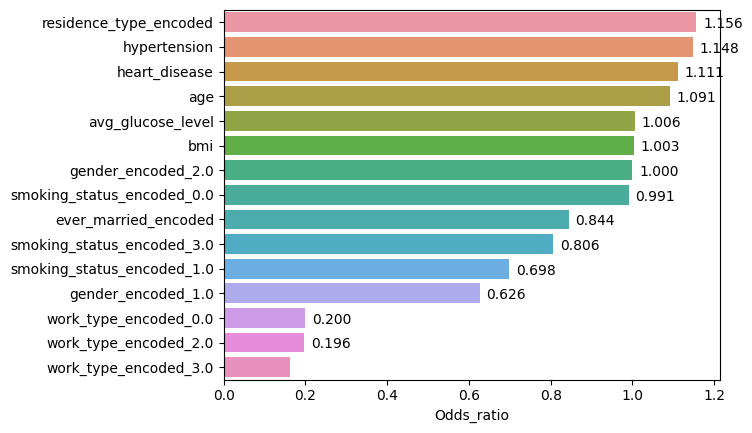

In [20]:
from ast import increment_lineno
#데이터프레임 dft1의 막대그래프 그리기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


ax = sns.barplot(y=dft1.index, x = "Odds_ratio", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" %p.get_width(), (p.get_x()+p.get_width(), p.get_y()+1.2), xytext=(5, 10), textcoords = 'offset points')

In [21]:
#구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
df_num = df[numeric_cols]

#StandardScaler()로 데이터 스케일을 표준화하고, 결과를 데이터프레임으로 만든다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

#StandardScaler()는 변수명을 지우므로 데이터프레임에 다시 변수명을 넣는다.

df_num_standard.columns = df_num.columns
df_num_standard.head(3)

,age,avg_glucose_level,bmi
0,0.969492,2.887925,0.904522
1,1.714023,0.029109,0.312804
2,-0.061397,1.549914,0.587015


In [22]:
#원래 데이터프레임 df에서 구간 변수들을 제거하여 df_cat에 저장
df_cat = df.drop(numeric_cols, axis=1)

In [23]:
#구간 변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis = 1)

#dfu의 변수명을 나열
dfu_standard.columns

Index(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
       'stroke', 'ever_married_encoded', 'residence_type_encoded',
       'gender_encoded_1.0', 'gender_encoded_2.0', 'work_type_encoded_0.0',
       'work_type_encoded_2.0', 'work_type_encoded_3.0',
       'smoking_status_encoded_0.0', 'smoking_status_encoded_1.0',
       'smoking_status_encoded_3.0'],
      dtype='object')

In [24]:
dfu_standard.to_csv(
    '/content/drive/MyDrive/Orange3_colab/Orange3/Logistic_Regression_Stroke/stroke-standard.csv', index=False
)

In [25]:
#표준화된 데이터프레임을 다시 언더샘플링과 데이터 분할
data = dfu_standard.drop(['stroke'], axis = 1) #타깃 변수를 제외한 변수를 data에 저장
target = dfu_standard['stroke'] # 타깃 변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler

#타깃 변수의 소수 클래스 및 다수 클래스를 1:3의 비율로 언더샘플링
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state = 2)

#data와 target에 언더샘플링 적용
data_under, target_under = undersample.fit_resample(data, target)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size = 0.5, random_state = 42, stratify = target_under
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (386, 15)
X_test shape: (386, 15)


In [26]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', random_state = 0, n_jobs = -1)

#그리드 서치

lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', random_state = 0, n_jobs = -1)

from sklearn.model_selection import GridSearchCV
params = {'solver' :['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'accuracy', cv=5, n_jobs = -1)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy: {:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set: {:.5f}".format(accuracy_score(y_test, pred)))

GridSearchCV max accuracy: 0.77216
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Accuracy on test set: 0.75389


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
